In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import math
plt.style.use('./deeplearning.mplstyle')

In [2]:
x_train = np.array([1.0, 2.0])       # Features
y_train = np.array([300.0, 500.0])   # Targets 

In [4]:
def compute_cost(X, Y, w, b):
    return np.mean((np.dot(X, w) + b - Y) ** 2)/2

In [5]:
def compute_gradient(X, Y, w, b):
    dj_dw = np.mean((np.dot(X, w) + b - Y) * X)
    dj_db = np.mean(np.dot(X, w) + b - Y)
    return dj_dw, dj_db

In [24]:
def make_line(dj_dx, x1, y1, d, ax):
    x = np.linspace(x1-d, x1+d, 50)
    y = dj_dx * (x - x1) + y1

    ax.scatter(x1, y1, color='blue', s=50)
    ax.plot(x, y, '--', lw=1, color='darkred', zorder=10)
    xoff = 30 if x1 == 200 else 10
    ax.annotate(r'$\frac{\partial J}{\partial w} =%d$' % dj_dx, xy=(x1, y1), xycoords='data',
                xytext=(xoff, 10), textcoords='offset points')
    
    
def plt_gradients(X, Y, f_compute_cost, f_compute_gradient):
    fixed_b = 100
    w_array = np.linspace(0, 400, 50)
    cost = np.zeros_like(w_array)

    for i in range(len(w_array)):
        cost[i] = f_compute_cost(X, Y, w_array[i], fixed_b)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(w_array, cost, lw=1, color='blue')
    ax.set_ylabel('Cost')
    ax.set_xlabel('w')    
    ax.set_title('Cost vs w, with gradient; b set to 100')

    for curr_w in [100, 200, 300]:
        dj_dw, dj_db = f_compute_gradient(X, Y, curr_w, fixed_b)
        cost_at_w = f_compute_cost(X, Y, curr_w, fixed_b)
        make_line(dj_dw, curr_w, cost_at_w, 30, ax=ax)


In [ ]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [53]:
def gradient_descent(X, Y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    w, b = w_in, b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, Y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:      # prevent resource exhaustion 
            J_history.append(cost_function(X, Y, w,b))
            p_history.append([w, b])

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or num_iters - i <= 5:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
        if len(J_history) > 1 and abs(J_history[-2] - J_history[-1]) < 1e-6:
            break
 
    return w, b, J_history, p_history #return w and J,w history for graphing


In [ ]:
w_init, b_init, alpha, num_iters = 0, 0, 1.0e-2, 10000
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, num_iters, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)"); ax2.set_title("Cost vs. iteration(end)")
ax1.set_ylabel('Cost'); ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [ ]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

In [92]:
def inbounds(point, base, xlim, ylim):
    arr = np.array([point, base])  # shape (2,2)
    return np.all((xlim[0] <= arr[:,0]) & (arr[:,0] <= xlim[1]) &
                  (ylim[0] <= arr[:,1]) & (arr[:,1] <= ylim[1]))


def plt_contour_wgrad(X, Y, hist, ax, w_range=[-100, 500, 5], b_range = [-500, 500, 5], w_final=200, b_final=100, resolution=5, 
                      contours = [0.1,50,1000,5000,10000,25000,50000],
                      steps=10):
    b0, w0 = np.meshgrid(np.arange(*b_range), np.arange(*w_range))
    z = np.zeros_like(b0)
    for i in range(w0.shape[0]):
        for j in range(w0.shape[1]):
            z[i][j] = compute_cost(X, Y, w0[i][j], b0[i][j])
            if z[i][j] == 0:
                z[i][j] = 1e-6
                

    CS = ax.contour(w0, b0, z, contours, linewidths=2)
    ax.clabel(CS, inline=1, fmt='%1.0f', fontsize=10)
    ax.set_xlabel("w"); ax.set_ylabel("b")
    ax.set_title('Contour plot of cost J(w,b), vs b,w with path of gradient descent')
    w = w_final; b = b_final
    ax.hlines(b, ax.get_xlim()[0], w, lw=2, color='purple', ls='dotted')
    ax.vlines(w, ax.get_ylim()[0], b, lw=2, color='purple', ls='dotted')

    base = hist[0]
    for point in hist[0::steps]:
        edist = math.sqrt((point[0] - base[0])**2 + (point[1] - base[1])**2)
        if (edist > resolution or point==hist[-1]):
            if inbounds(point, base, ax.get_xlim(), ax.get_ylim()):
                plt.annotate('', xy=point, xytext=base, xycoords='data',
                             arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 3},
                         va='center', ha='center')
            base=point
    return

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

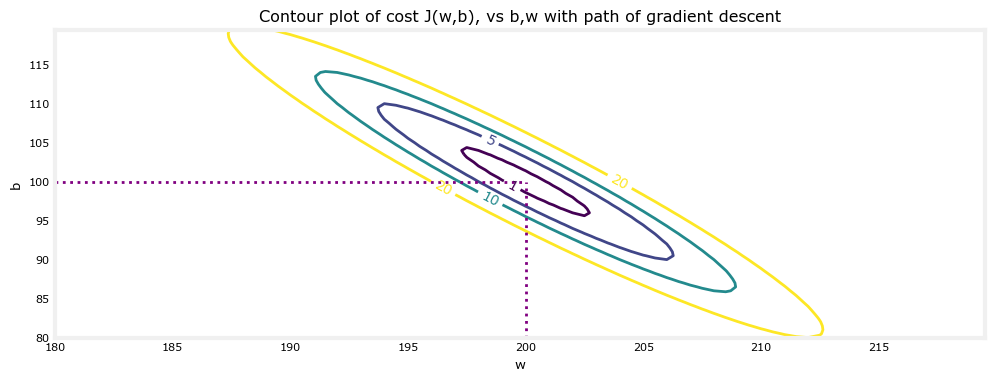

In [94]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

In [ ]:
def plt_divergence(p_hist, J_hist, X, Y):
    x = np.zeros(len(p_hist))
    y = np.zeros(len(p_hist))
    v = np.zeros(len(p_hist))
    for i in range(len(p_hist)):
        x[i] = p_hist[i][0]
        y[i] = p_hist[i][1]
        v[i] = J_hist[i]

    fig = plt.figure(figsize=(12,5))
    plt.subplots_adjust(wspace=0)
    gs = fig.add_gridspec(1, 5)
    fig.suptitle(f"Cost escalates when learning rate is too large")
    ax = fig.add_subplot(gs[:2])
    fixed_b = 100
    w_array = np.arange(-70000, 70000, 1000)
    cost = np.zeros_like(w_array)

    for i in range(len(w_array)):
        cost[i] = compute_cost(X, Y, w_array[i], fixed_b)
    
    ax.plot(w_array, cost)
    ax.plot(x, v, color='magenta')
    ax.set_title("Cost vs w, b set to 100")
    ax.set_ylabel('Cost')
    ax.set_xlabel('w')
    ax.xaxis.set_major_locator(MaxNLocator(2))

    tmp_b, tmp_w = np.meshgrid(np.arange(-35000, 35000, 500), np.arange(-70000, 70000, 500))
    z = np.zeros_like(tmp_w)
    for i in range(tmp_w.shape[0]):
        for j in range(tmp_w.shape[1]):
            z[i][j] = compute_cost(X, Y, tmp_w[i][j], tmp_b[i][j])

    ax = fig.add_subplot(gs[2:], projection='3d')
    ax.plot_surface(tmp_w, tmp_b, z, alpha=0.3, color='blue')
    ax.xaxis.set_major_locator(MaxNLocator(2))
    ax.yaxis.set_major_locator(MaxNLocator(2))
    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel('\ncost', fontsize=16)
    ax.set_title('Cost vs (b, w)')
    ax.view_init(elev=20., azim=-65)
    ax.plot(x, y, v, color='magenta')
    return

In [ ]:
plt_divergence(p_hist, J_hist, x_train, y_train)
plt.show()